In [1]:
import pandas as pd

In [2]:
import glob

In [3]:
fns = glob.glob('/data/odc/derivatives/encoding_model/sub-*/ses-*/func/sub-*_desc-*.pkl.gz')

In [4]:
df = []

for fn in fns:
    df.append(pd.read_pickle(fn))
    
df = pd.concat(df)

In [6]:
import numpy as np

In [7]:
df.loc[(df['eye'] == 'left') & (df['bayes factor'] > 1), 'correct'] = 1
df.loc[(df['eye'] == 'left') & (df['bayes factor'] < 1), 'correct'] = 0

df.loc[(df['eye'] == 'right') & (df['bayes factor'] > 1), 'correct'] = 0
df.loc[(df['eye'] == 'right') & (df['bayes factor'] < 1), 'correct'] = 1

df['correct'] = df['correct'].astype(float)

df['log(bayes factor)'] = np.log(df['bayes factor'])
df['q(log(bayes_factor))'] = pd.qcut(df['bayes factor'], 10)

In [8]:
import seaborn as sns

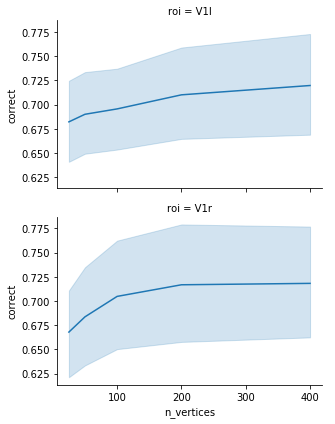

In [9]:
fac = sns.FacetGrid(df[df.n_vertices < 600].reset_index().groupby(['subject', 'session', 'n_vertices', 'task', 'roi'], as_index=False).mean(), row='roi', 
                   aspect=1.5)
fac.map(sns.lineplot, 'n_vertices', 'correct')
fac.add_legend()

In [15]:
df = df[np.in1d(df.roi, ['V1l', 'V1r'])]

In [20]:
df = df[~((df.subject == 'bm') & (df.roi == 'V1l'))]

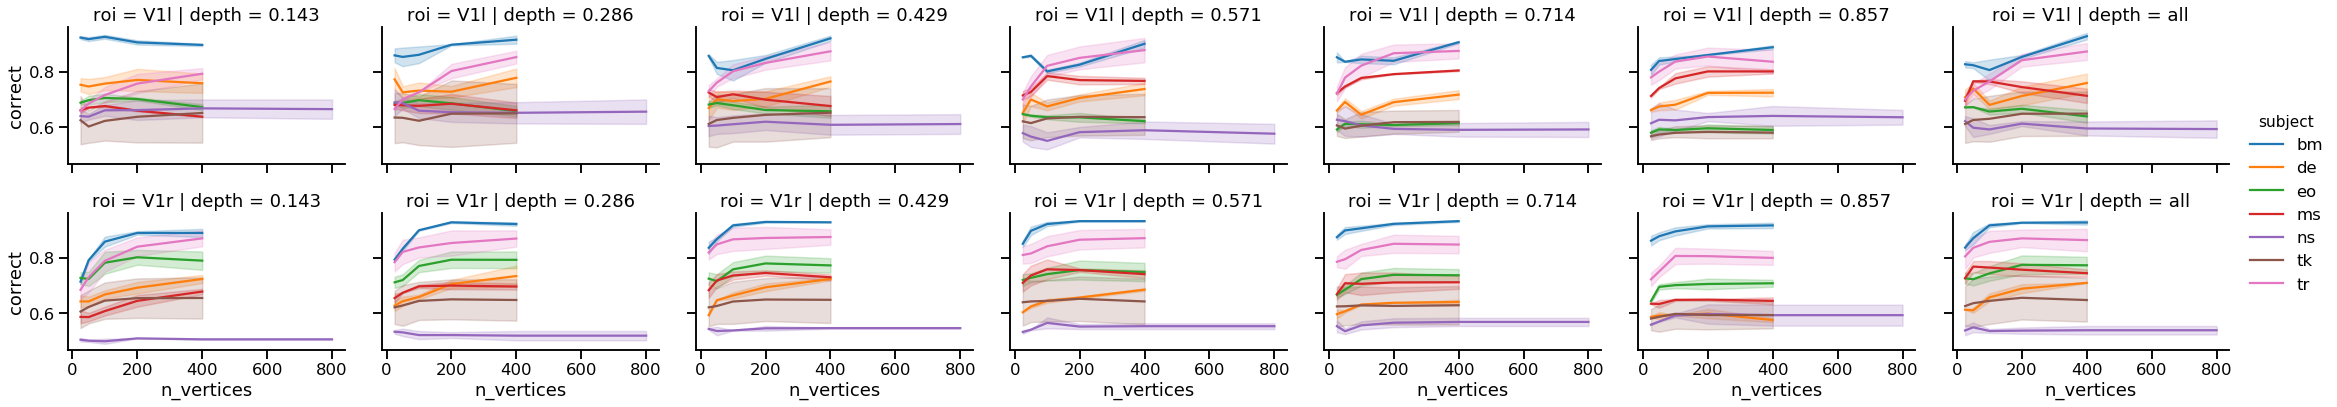

In [16]:
fac = sns.FacetGrid(df.reset_index().groupby(['subject', 'session', 'n_vertices', 'task', 'depth', 'roi'], as_index=False).mean(), row='roi', 
                    hue='subject',
                    col='depth',
                   aspect=1.5)
fac.map(sns.lineplot, 'n_vertices', 'correct')
fac.add_legend()

In [21]:
sns.set_context('talk')

In [22]:
import matplotlib.pyplot as plt

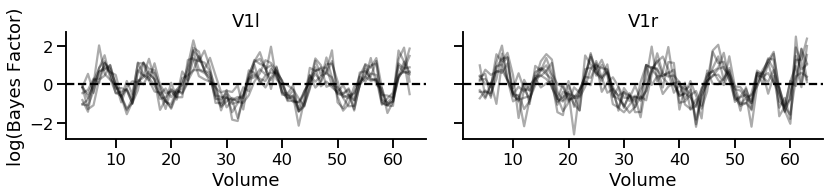

In [130]:
tmp = df[(df.n_vertices == 400) & (df.depth == 'all') & (df.subject == 'tr')].groupby(['subject', 'run', 'frame', 'task', 'roi']).mean()
tmp['log(Bayes Factor)'] = tmp['log(bayes factor)']
tmp['Volume'] = tmp.index.get_level_values('frame')
fac = sns.FacetGrid(tmp.reset_index(), col='roi', hue='run', row='subject', aspect=2, palette=['k'])
fac.map_dataframe(sns.lineplot, 'Volume', 'log(Bayes Factor)', style='task', alpha=0.33)
fac.set_titles("{col_name}")
fac.set_titles

for ax in fac.axes.ravel():
    ax.axhline(0, c='k', ls='--')
    
plt.savefig('/data/odc/figures/timecourse.pdf', transparent=True)  

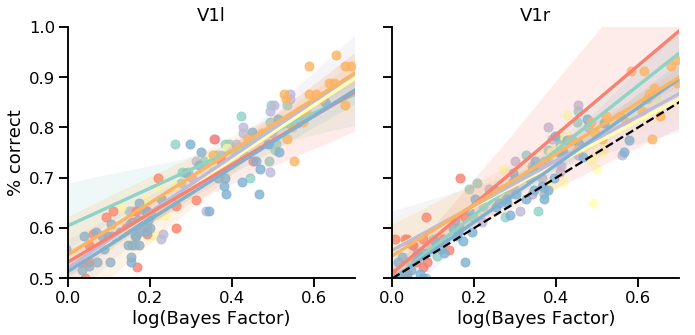

In [170]:
tmp = df[(df.n_vertices == 400)].reset_index().groupby(['subject', 'session', 'run', 'roi', 'depth', 'eye'], as_index=False).mean()
tmp.loc[tmp['eye'] == 'left', 'log(bayes factor_correct)'] = tmp['log(bayes factor)']
tmp.loc[tmp['eye'] == 'right', 'log(bayes factor_correct)'] = -tmp['log(bayes factor)']


tmp['% correct'] = tmp['correct']
tmp['log(Bayes Factor)'] = tmp['log(bayes factor_correct)']

fac = sns.lmplot('log(Bayes Factor)', '% correct', col='roi', hue='subject', 
           data=tmp[tmp.subject !='bm'].iloc[::5], legend=False, aspect=1., height=5., palette='Set3')

plt.plot([0., 1], [.5, 1], c='k', ls='--')
fac.set_titles("{col_name}")


plt.ylim(.5, 1.)
plt.xlim(0., .7)

plt.savefig('/data/odc/figures/bf_correct.pdf', transparent=True)


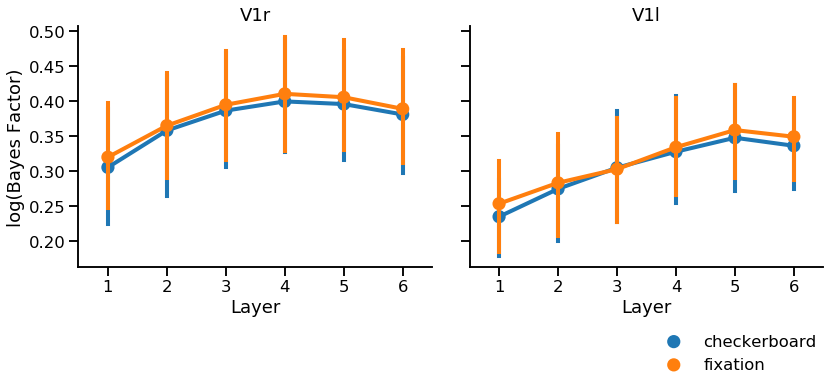

In [185]:
tmp = df[(df.n_vertices == 400)].reset_index().groupby(['subject', 'session', 'depth','roi', 'eye', 'task'], as_index=False).mean()
tmp.loc[tmp['eye'] == 'left', 'log(bayes factor_correct)'] = tmp['log(bayes factor)']
tmp.loc[tmp['eye'] == 'right', 'log(bayes factor_correct)'] = -tmp['log(bayes factor)']

tmp['bf'] = tmp['log(bayes factor_correct)']
depths = tmp.depth.unique().tolist()

tmp['Layer'] = tmp.depth.apply(lambda x: 6 - depths.index(x))

tmp = tmp[~((tmp.subject == 'ms') & (tmp.roi == 'V1l'))]
tmp['log(Bayes Factor)'] = tmp['log(bayes factor_correct)']


tmp = tmp.groupby(['subject', 'session', 'depth', 'roi', 'task'], as_index=False).mean()
tmp['subject_session'] = tmp.apply(lambda row: '{subject}_{session}'.format(**row.to_dict()), 1)

tmp = tmp[tmp.depth != 'all']
fac = sns.catplot('Layer', 'log(Bayes Factor)', hue='task', 
                  col='roi',data=tmp[tmp.depth != 'all'], 
                  kind='point', ci=67, height=6., col_ord=['V1l', 'V1r'], legend=False)
fac.set_titles("{col_name}")

plt.legend(bbox_to_anchor=(1., -.25), loc=None, borderaxespad=0, frameon=False)
plt.tight_layout()

plt.savefig('/data/odc/figures/information_depth.pdf', transparent=True)

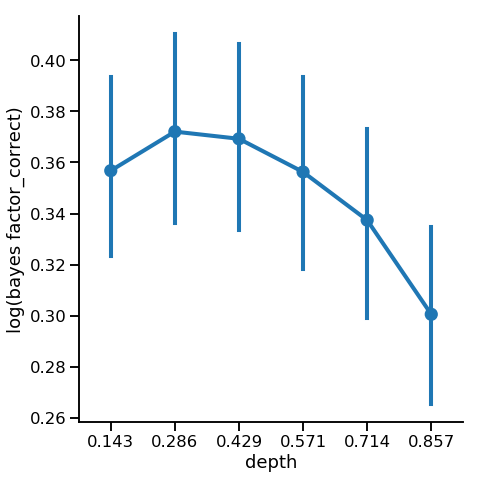

In [25]:
tmp = df[df.n_vertices == 400].reset_index().groupby(['subject', 'session', 'roi', 'depth', 'eye'], as_index=False).mean()
tmp.loc[tmp['eye'] == 'left', 'log(bayes factor_correct)'] = tmp['log(bayes factor)']
tmp.loc[tmp['eye'] == 'right', 'log(bayes factor_correct)'] = -tmp['log(bayes factor)']

sns.catplot('depth', 'log(bayes factor_correct)', data=tmp[tmp.depth != 'all'], kind='point', ci=67, height=7)

In [29]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [76]:
tmp = df[df.n_vertices == 400].reset_index().groupby(['subject', 'session', 'depth','roi', 'eye'], as_index=False).mean()
tmp.loc[tmp['eye'] == 'left', 'log(bayes factor_correct)'] = tmp['log(bayes factor)']
tmp.loc[tmp['eye'] == 'right', 'log(bayes factor_correct)'] = -tmp['log(bayes factor)']

tmp['bf'] = tmp['log(bayes factor_correct)']

tmp = tmp.groupby(['subject', 'session', 'depth', 'roi'], as_index=False).mean()
tmp['subject_session'] = tmp.apply(lambda row: '{subject}_{session}'.format(**row.to_dict()), 1)
tmp = tmp[tmp.roi == 'V1r']

tmp = tmp[tmp.depth != 'all']

tmp.groupby(['subject', 'depth']).size().head()

subject  depth
bm       0.143    1
         0.286    1
         0.429    1
         0.571    1
         0.714    1
dtype: int64

In [71]:
%%R -i tmp
print(summary(aov(bf ~ depth + Error(subject_session), data=tmp)))

library(BayesFactor)

bf = anovaBF(bf ~ depth + subject_session, data =tmp,  whichRandom="subject_session")


Error: subject_session
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  7  2.375  0.3393               

Error: Within
          Df  Sum Sq  Mean Sq F value  Pr(>F)   
depth      5 0.04794 0.009588   4.252 0.00399 **
Residuals 35 0.07892 0.002255                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


R[write to console]: Error in library(BayesFactor) : there is no package called ‘BayesFactor’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library




Error in library(BayesFactor) : there is no package called ‘BayesFactor’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library


In [151]:
tmp = df[df.n_vertices == 400].reset_index().groupby(['subject', 'session', 'depth','roi', 'task', 'eye'], as_index=False).mean()
tmp.loc[tmp['eye'] == 'left', 'log(bayes factor_correct)'] = tmp['log(bayes factor)']
tmp.loc[tmp['eye'] == 'right', 'log(bayes factor_correct)'] = -tmp['log(bayes factor)']

tmp['bf'] = tmp['log(bayes factor_correct)']

tmp = tmp.groupby(['subject', 'session', 'depth','task', 'roi'], as_index=False).mean()
tmp['subject_session'] = tmp.apply(lambda row: '{subject}_{session}'.format(**row.to_dict()), 1)
# tmp = tmp[tmp.roi == 'V1r']

tmp = tmp[tmp.depth != 'all']

tmp.groupby(['subject', 'depth']).size().head()

subject  depth
bm       0.143    2
         0.286    2
         0.429    2
         0.571    2
         0.714    2
dtype: int64

In [152]:
%%R -i tmp
print(summary(aov(bf ~ task*depth + Error(subject_session), data=tmp)))

library(BayesFactor)

bf = anovaBF(bf ~ depth + (subject_session/roi), data =tmp,  whichRandom=c("subject_session", "roi"))


Error: subject_session
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  7  6.172  0.8817               

Error: Within
            Df Sum Sq  Mean Sq F value Pr(>F)  
task         1 0.0040 0.004050   0.494 0.4832  
depth        5 0.1062 0.021239   2.590 0.0277 *
task:depth   5 0.0003 0.000062   0.008 1.0000  
Residuals  161 1.3201 0.008200                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


R[write to console]: Error in library(BayesFactor) : there is no package called ‘BayesFactor’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library




Error in library(BayesFactor) : there is no package called ‘BayesFactor’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library


In [106]:
tmp = df[df.n_vertices == 400].reset_index().groupby(['subject', 'session', 'depth', 'task', 'eye'], as_index=False).mean()
tmp.loc[tmp['eye'] == 'left', 'log(bayes factor_correct)'] = tmp['log(bayes factor)']
tmp.loc[tmp['eye'] == 'right', 'log(bayes factor_correct)'] = -tmp['log(bayes factor)']

tmp['bf'] = tmp['log(bayes factor_correct)']

tmp = tmp.groupby(['subject', 'session', 'depth','task'], as_index=False).mean()
tmp['subject_session'] = tmp.apply(lambda row: '{subject}_{session}'.format(**row.to_dict()), 1)

tmp = tmp[tmp.depth != 'all']

tmp.groupby(['subject', 'depth']).size().head()

subject  depth
bm       0.143    2
         0.286    2
         0.429    2
         0.571    2
         0.714    2
dtype: int64

In [107]:
%%R -i tmp
print(summary(aov(bf ~ task*depth + Error(subject_session), data=tmp)))

library(BayesFactor)

bf = anovaBF(bf ~ depth + subject_session, data =tmp,  whichRandom="subject_session")


Error: subject_session
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  7  4.137   0.591               

Error: Within
           Df  Sum Sq  Mean Sq F value Pr(>F)  
task        1 0.00034 0.000341   0.090 0.7653  
depth       5 0.04985 0.009969   2.623 0.0304 *
task:depth  5 0.00018 0.000035   0.009 1.0000  
Residuals  77 0.29265 0.003801                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


R[write to console]: Error in library(BayesFactor) : there is no package called ‘BayesFactor’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library




Error in library(BayesFactor) : there is no package called ‘BayesFactor’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library


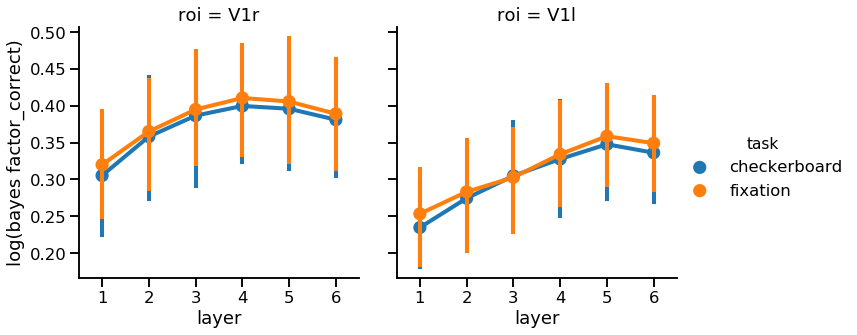

In [161]:
tmp

subject session  depth  roi          task  run  frame  bayes factor  \
0        bm     odc  0.143  V1r  checkerboard  6.0   33.5      1.595640   
1        bm     odc  0.143  V1r      fixation  5.0   33.5      1.590020   
2        bm     odc  0.286  V1r  checkerboard  6.0   33.5      1.591904   
3        bm     odc  0.286  V1r      fixation  5.0   33.5      1.581283   
4        bm     odc  0.429  V1r  checkerboard  6.0   33.5      1.609582   
5        bm     odc  0.429  V1r      fixation  5.0   33.5      1.577184   
6        bm     odc  0.571  V1r  checkerboard  6.0   33.5      1.673522   
7        bm     odc  0.571  V1r      fixation  5.0   33.5      1.575352   
8        bm     odc  0.714  V1r  checkerboard  6.0   33.5      1.699654   
9        bm     odc  0.714  V1r      fixation  5.0   33.5      1.541986   
10       bm     odc  0.857  V1r  checkerboard  6.0   33.5      1.701891   
11       bm     odc  0.857  V1r      fixation  5.0   33.5      1.518819   
14       de    odc1  0.143  V1l  checkerboard  5.0   33.5      1.400497   
15       de    odc1  0.143  V1l      fixation  4.0   33.5      1.405838   
16       de    odc1  0.143  V1r  checkerboard  5.0   33.5      1.310131   
17       de    odc1  0.143  V1r      fixation  4.0   33.5      1.253837   
18       de    odc1  0.286  V1l  checkerboard  5.0   33.5      1.380003   
19       de    odc1  0.286  V1l      fixation  4.0   33.5      1.335456   
20       de    odc1  0.286  V1r  checkerboard  5.0   33.5      1.264732   
21       de    odc1  0.286  V1r      fixation  4.0   33.5      1.239399   
22       de    odc1  0.429  V1l  checkerboard  5.0   33.5      1.375902   
23       de    odc1  0.429  V1l      fixation  4.0   33.5      1.300339   
24       de    odc1  0.429  V1r  checkerboard  5.0   33.5      1.282573   
25       de    odc1  0.429  V1r      fixation  4.0   33.5      1.246287   
26       de    odc1  0.571  V1l  checkerboard  5.0   33.5      1.332749   
27       de    odc1  0.571  V1l      fixation  4.0   33.5      1.286334   
28       de    odc1  0.571  V1r  checkerboard  5.0   33.5      1.239745   
29       de    odc1  0.571  V1r      fixation  4.0   33.5      1.231341   
30       de    odc1  0.714  V1l  checkerboard  5.0   33.5      1.322495   
31       de    odc1  0.714  V1l      fixation  4.0   33.5      1.268566   
..      ...     ...    ...  ...           ...  ...    ...           ...   
158      tk    odc3  0.714  V1r  checkerboard  6.0   33.5      1.304101   
159      tk    odc3  0.714  V1r      fixation  5.0   33.5      1.291512   
160      tk    odc3  0.857  V1l  checkerboard  6.0   33.5      1.248619   
161      tk    odc3  0.857  V1l      fixation  5.0   33.5      1.318621   
162      tk    odc3  0.857  V1r  checkerboard  6.0   33.5      1.274466   
163      tk    odc3  0.857  V1r      fixation  5.0   33.5      1.291680   
168      tr     odc  0.143  V1l  checkerboard  5.0   33.5      1.437194   
169      tr     odc  0.143  V1l      fixation  4.0   33.5      1.526944   
170      tr     odc  0.143  V1r  checkerboard  5.0   33.5      1.380020   
171      tr     odc  0.143  V1r      fixation  4.0   33.5      1.458484   
172      tr     odc  0.286  V1l  checkerboard  5.0   33.5      1.477618   
173      tr     odc  0.286  V1l      fixation  4.0   33.5      1.509119   
174      tr     odc  0.286  V1r  checkerboard  5.0   33.5      1.435327   
175      tr     odc  0.286  V1r      fixation  4.0   33.5      1.519270   
176      tr     odc  0.429  V1l  checkerboard  5.0   33.5      1.430274   
177      tr     odc  0.429  V1l      fixation  4.0   33.5      1.454067   
178      tr     odc  0.429  V1r  checkerboard  5.0   33.5      1.488393   
179      tr     odc  0.429  V1r      fixation  4.0   33.5      1.517810   
180      tr     odc  0.571  V1l  checkerboard  5.0   33.5      1.486402   
181      tr     odc  0.571  V1l      fixation  4.0   33.5      1.424558   
182      tr     odc  0.571  V1r  checkerboard  5.0   33.5      1.506599   
183      tr     odc  0.571  V

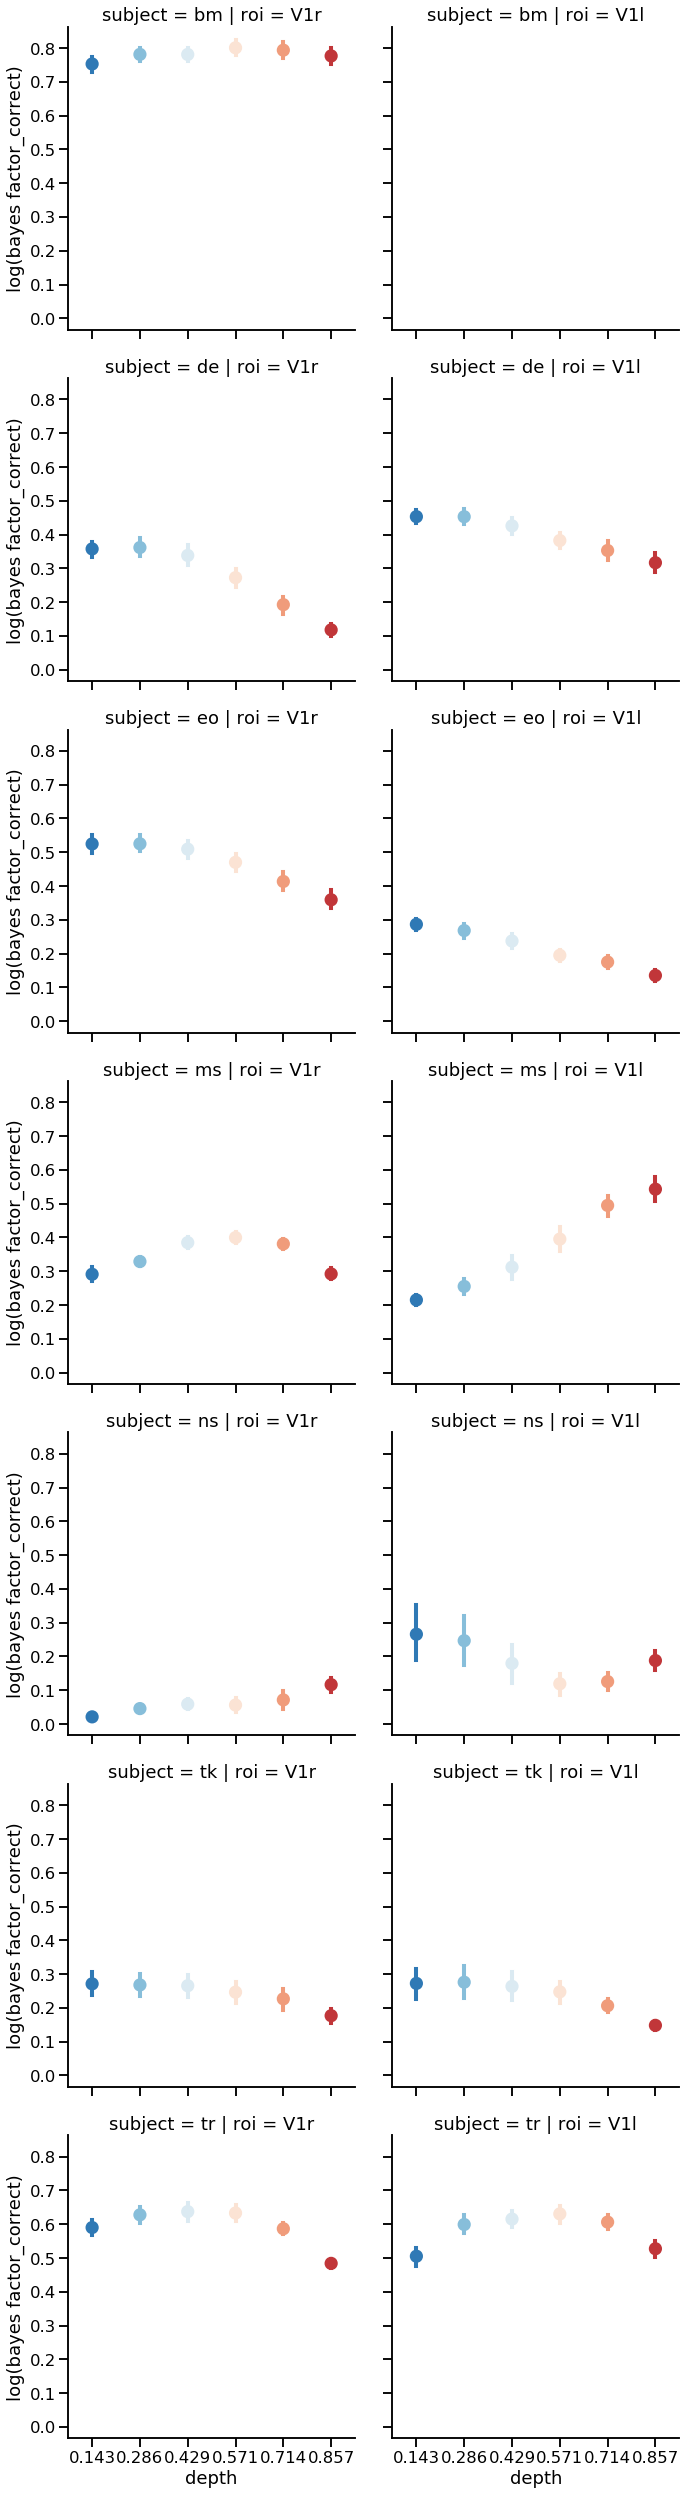

In [154]:
tmp = df[df.n_vertices == 400].reset_index().groupby(['subject', 'session', 'depth','roi', 'run', 'eye', 'task'], as_index=False).mean()
tmp.loc[tmp['eye'] == 'left', 'log(bayes factor_correct)'] = tmp['log(bayes factor)']
tmp.loc[tmp['eye'] == 'right', 'log(bayes factor_correct)'] = -tmp['log(bayes factor)']

tmp['bf'] = tmp['log(bayes factor_correct)']

tmp = tmp.groupby(['subject', 'session', 'depth', 'run', 'roi'], as_index=False).mean()

tmp = tmp[tmp.depth != 'all']
sns.catplot('depth', 'log(bayes factor_correct)', row='subject', col='roi', data=tmp[tmp.depth != 'all'], kind='point', ci=67, palette='RdBu_r')

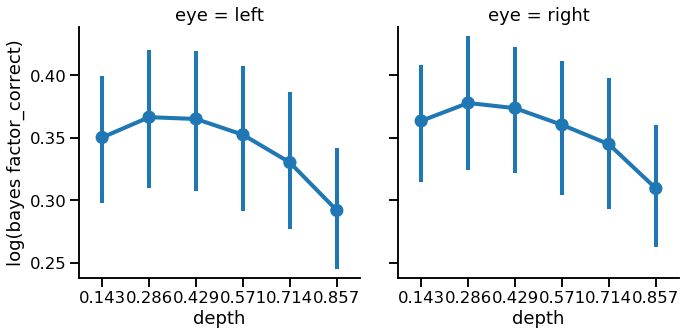

In [49]:
tmp = df[df.n_vertices == 400].reset_index().groupby(['subject', 'session', 'roi', 'depth', 'eye'], as_index=False).mean()
tmp.loc[tmp['eye'] == 'left', 'log(bayes factor_correct)'] = tmp['log(bayes factor)']
tmp.loc[tmp['eye'] == 'right', 'log(bayes factor_correct)'] = -tmp['log(bayes factor)']

sns.catplot('depth', 'log(bayes factor_correct)', col='eye',data=tmp[tmp.depth != 'all'], kind='point', ci=67)

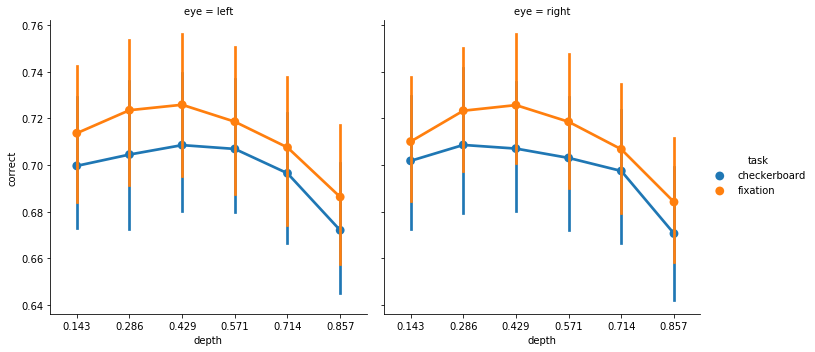

In [190]:
tmp = df[df.n_vertices == 400].reset_index().groupby(['subject', 'session', 'roi', 'task', 'depth', 'eye'], as_index=False).mean()
tmp.loc[tmp['eye'] == 'left', 'log(bayes factor_correct)'] = tmp['log(bayes factor)']
tmp.loc[tmp['eye'] == 'right', 'log(bayexzs factor_correct)'] = -tmp['log(bayes factor)']

sns.catplot('depth', 'correct', col='eye', hue='task', data=tmp[tmp.depth != 'all'], kind='point', ci=67)

In [ ]:
tmp = df[df.n_vertices == 400].reset_index().groupby(['subject', 'session', 'roi', 'task', 'depth', 'eye'], as_index=False).mean()
tmp.loc[tmp['eye'] == 'left', 'log(bayes factor_correct)'] = tmp['log(bayes factor)']
tmp.loc[tmp['eye'] == 'right', 'log(bayes factor_correct)'] = -tmp['log(bayes factor)']

sns.catplot('depth', 'log(bayes factor_correct)', 'task', col='eye', data=tmp[tmp.depth != 'all'], kind='point', ci=67)

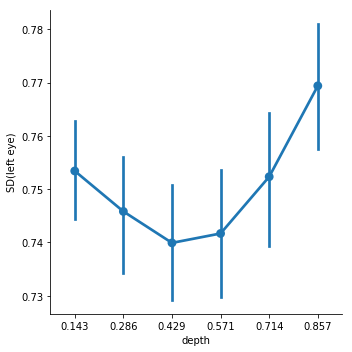

In [169]:
tmp = df[df.n_vertices == 400].groupby(['subject', 'session', 'roi', 'task', 'depth', 'eye'], as_index=False).mean()
tmp.loc[tmp['eye'] == 'left', 'log(bayes factor_correct)'] = tmp['log(bayes factor)']
tmp.loc[tmp['eye'] == 'right', 'log(bayes factor_correct)'] = -tmp['log(bayes factor)']

sns.catplot('depth', 'SD(left eye)', data=tmp[tmp.depth != 'all'], kind='point', ci=67)

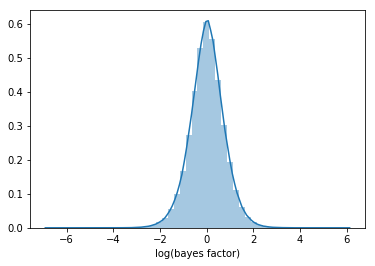

In [82]:
sns.distplot(df['log(bayes factor)'])

In [133]:
df = df[~((df.subject == 'bm') & (df.roi == 'V1l'))]

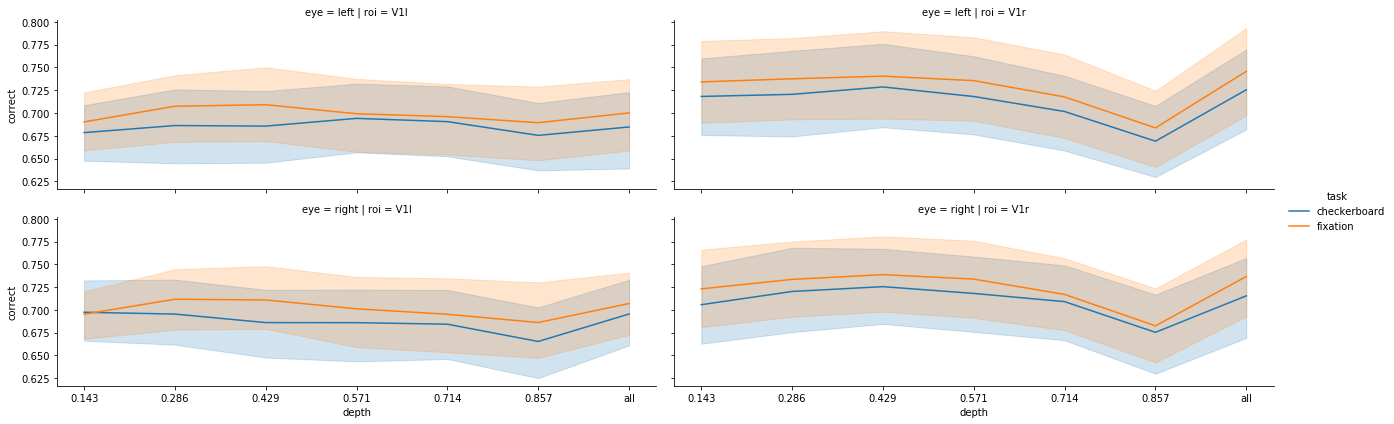

In [134]:
fac = sns.FacetGrid(df[df.n_vertices == 400].reset_index().groupby(['subject', 'session', 'depth', 'eye', 'task', 'roi'], as_index=False).mean(), 
                    col='roi', 
                    row='eye',
                    hue='task',
                    col_order=['V1l', 'V1r'],
                   aspect=3)
fac.map(sns.lineplot, 'depth', 'correct', ci=67)
fac.add_legend()

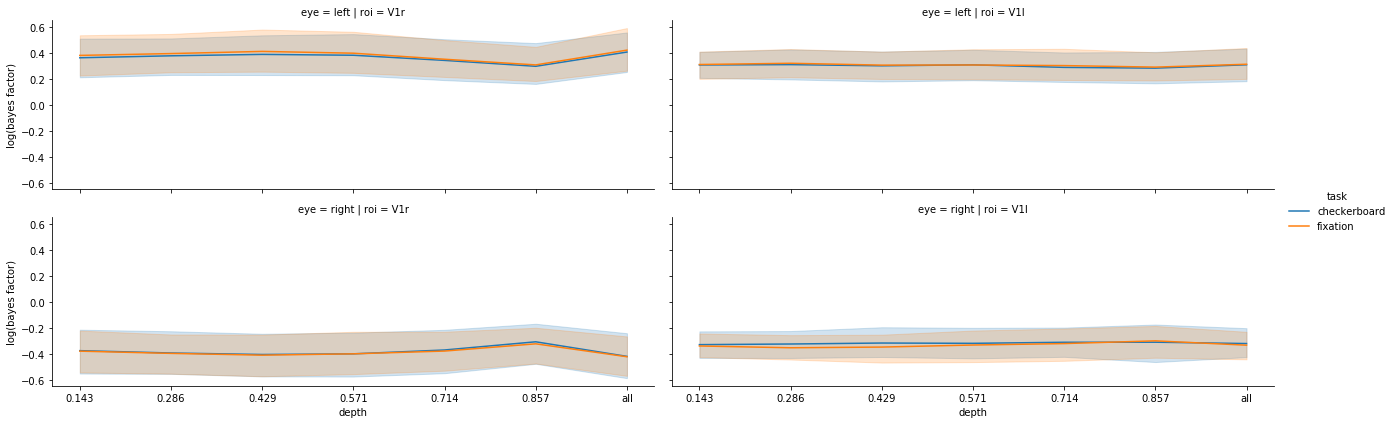

In [135]:
fac = sns.FacetGrid(df[df.n_vertices == 200].reset_index().groupby(['subject', 'session', 'depth', 'eye', 'task', 'roi'], as_index=False).mean(), 
                    col='roi', 
                    row='eye',
                    hue='task',
                   aspect=3)
fac.map(sns.lineplot, 'depth', 'log(bayes factor)')
fac.add_legend()

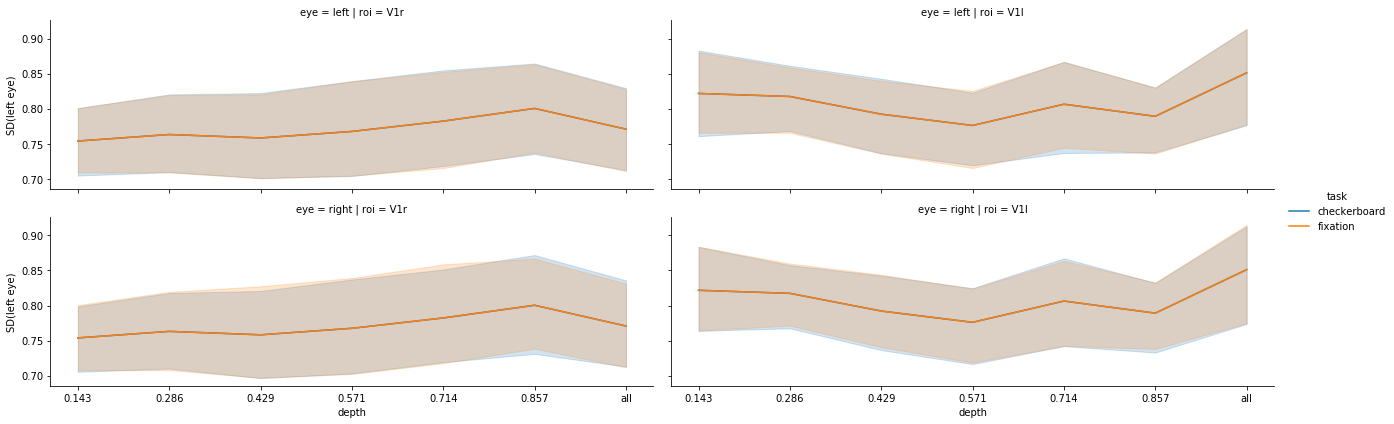

In [99]:
fac = sns.FacetGrid(df[df.n_vertices == 200].reset_index().groupby(['subject', 'session', 'depth', 'eye', 'task', 'roi'], as_index=False).mean(), 
                    col='roi', 
                    row='eye',
                    hue='task',
                   aspect=3)
fac.map(sns.lineplot, 'depth', 'SD(left eye)')
fac.add_legend()

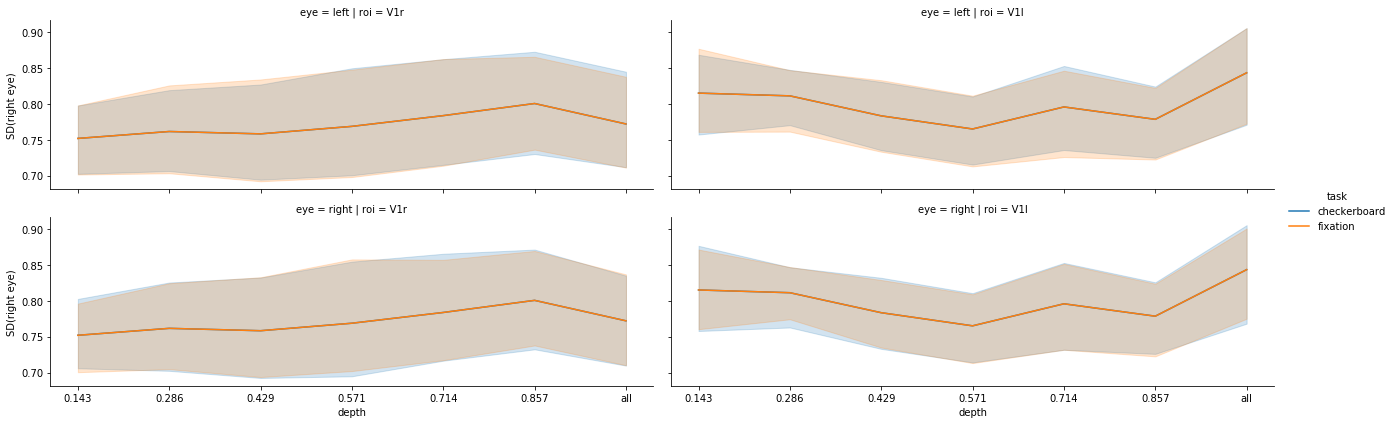

In [100]:
fac = sns.FacetGrid(df[df.n_vertices == 200].reset_index().groupby(['subject', 'session', 'depth', 'eye', 'task', 'roi'], as_index=False).mean(), 
                    col='roi', 
                    row='eye',
                    hue='task',
                   aspect=3)
fac.map(sns.lineplot, 'depth', 'SD(right eye)')
fac.add_legend()

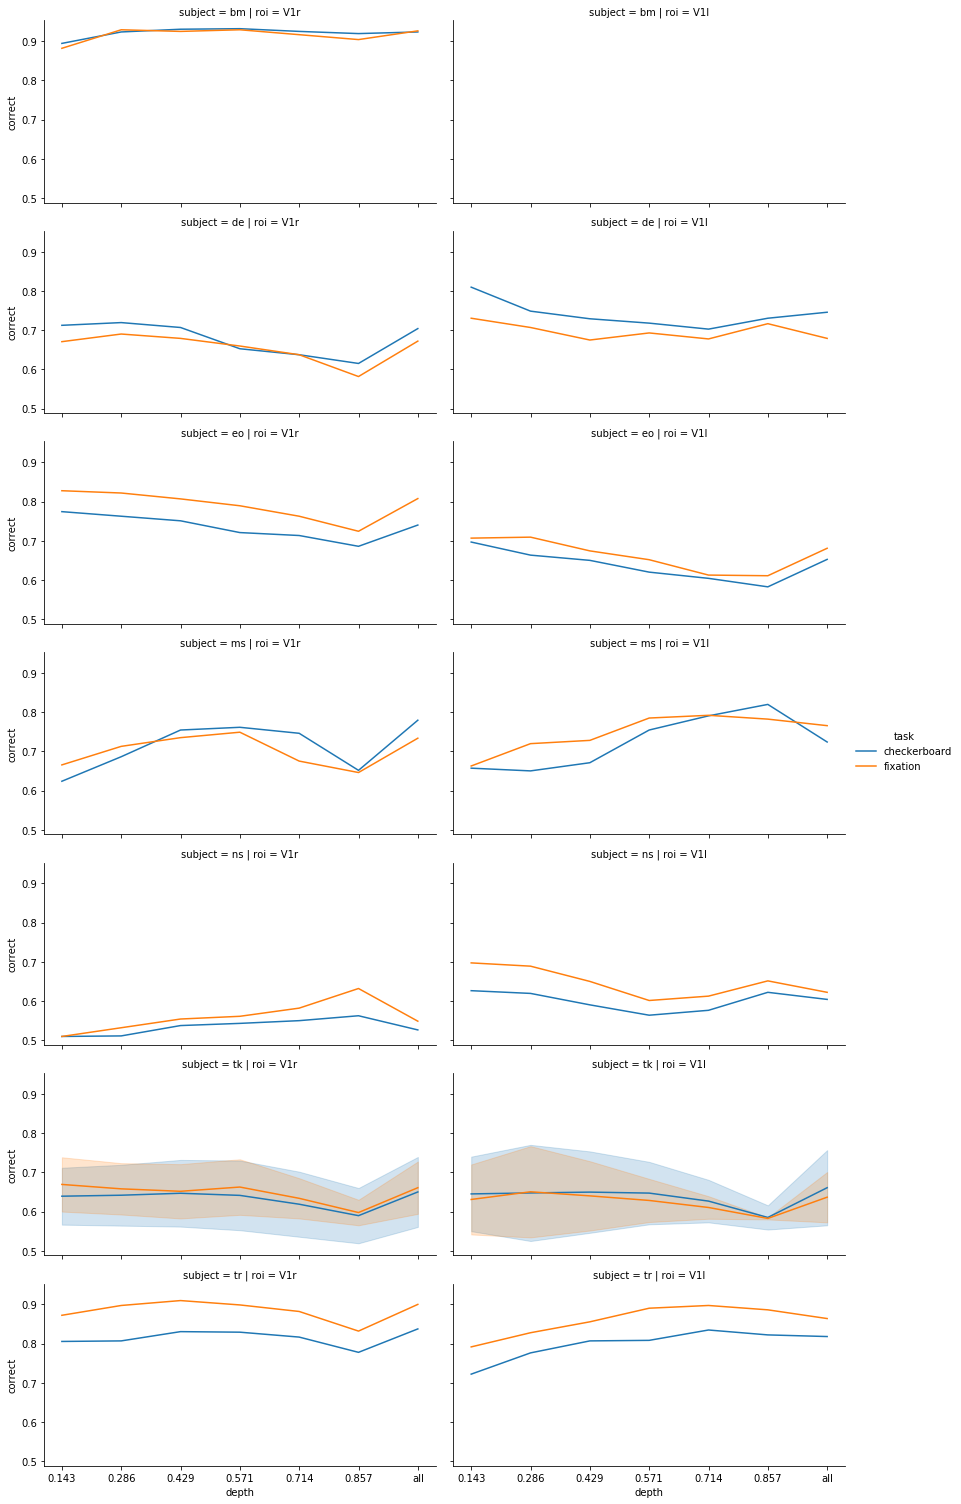

In [101]:
fac = sns.FacetGrid(df[df.n_vertices == 200].reset_index().groupby(['subject', 'session', 'task', 'depth', 'roi'], as_index=False).mean(), col='roi', hue='task',
                   aspect=2, row='subject')
fac.map(sns.lineplot, 'depth', 'correct', ci=67)
fac.add_legend()

In [102]:
import numpy as np

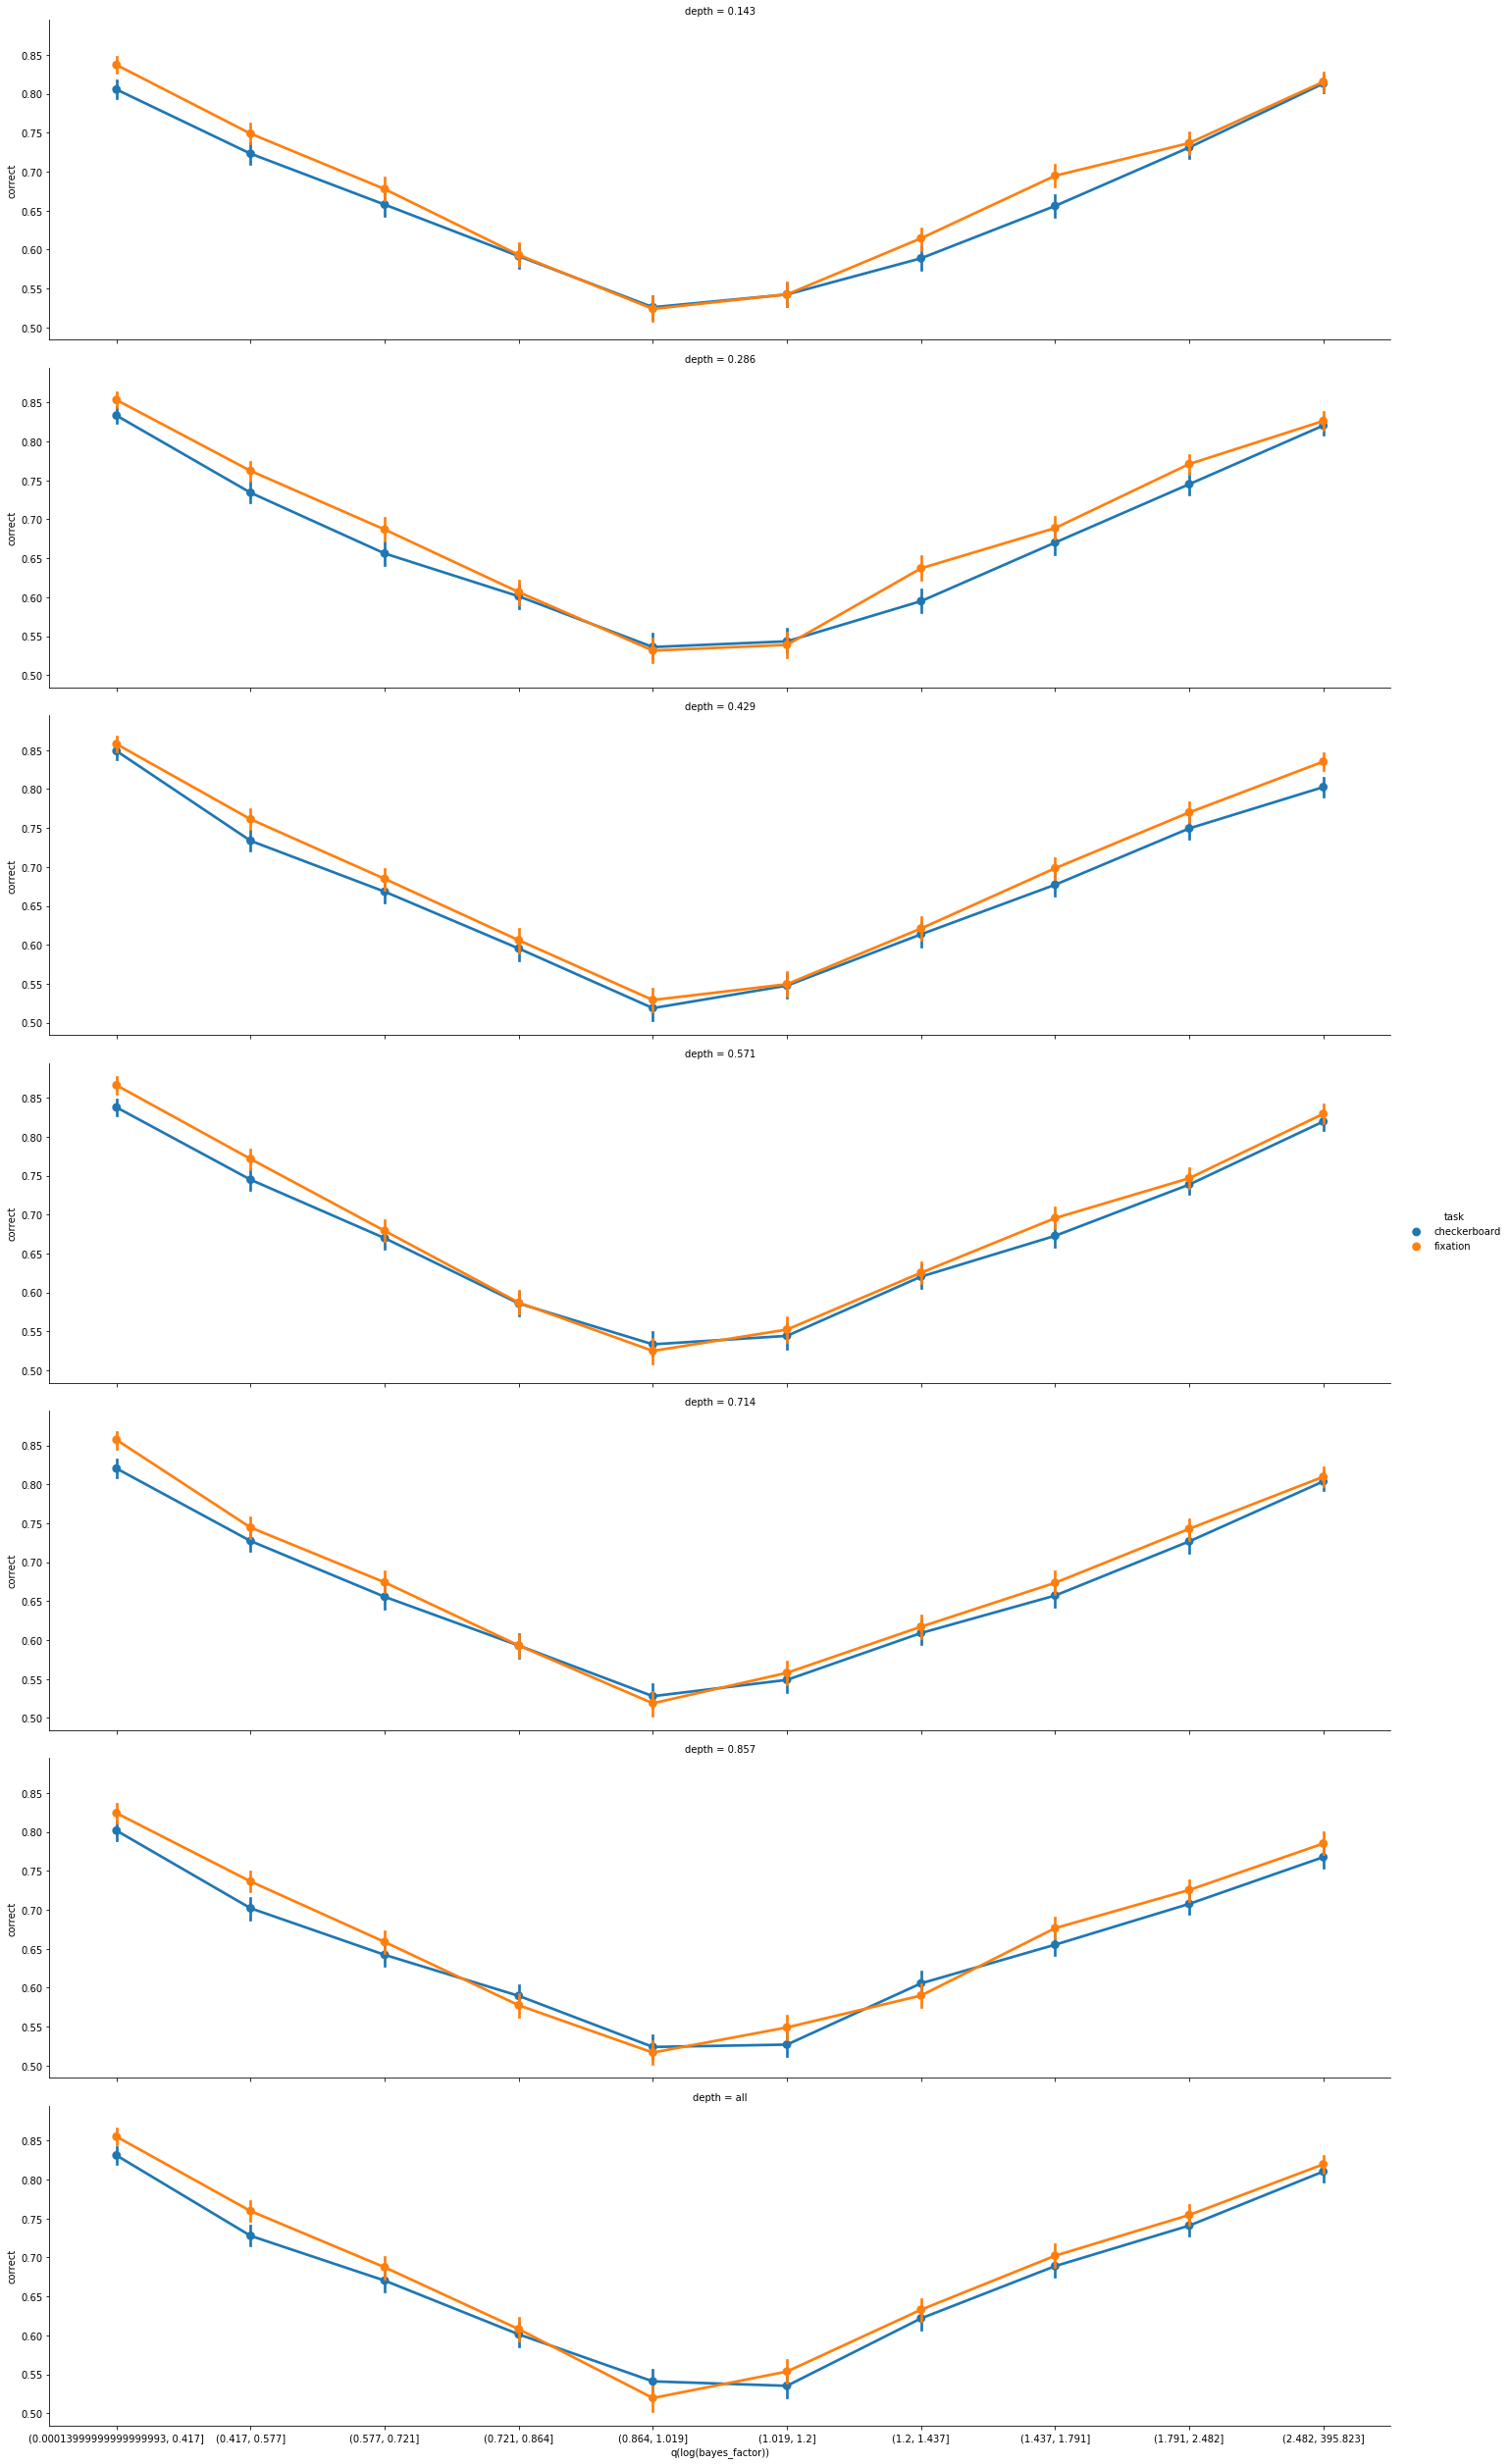

In [23]:
sns.catplot('q(log(bayes_factor))', 'correct', 'task', row='depth', data=df.reset_index(), kind='point', aspect=4)

In [27]:
import matplotlib.pyplot as plt

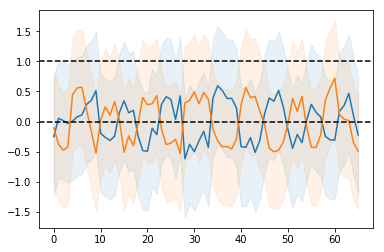

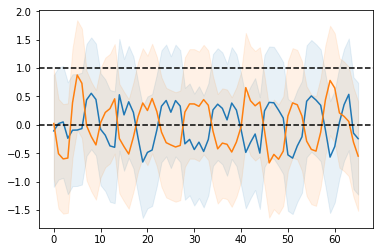

In [28]:
d = df.loc['checkerboard']
d = d[(d.depth == 'all') & (d.fold == 0)]

mean_frames = d.groupby('frame').mean()

plt.plot(d.groupby('frame').mean()['activation left eye'], color=sns.color_palette()[0])

plt.fill_between(mean_frames.index.get_level_values('frame'),
                 mean_frames['activation left eye'] - mean_frames['SD(left eye)'],
                 mean_frames['activation left eye'] + mean_frames['SD(left eye)'], 
                 color=sns.color_palette()[0],
                 alpha=0.1)

plt.plot(mean_frames['activation right eye'], color=sns.color_palette()[1])
plt.fill_between(mean_frames.index.get_level_values('frame'),
                 mean_frames['activation right eye'] - mean_frames['SD(right eye)'],
                 mean_frames['activation right eye'] + mean_frames['SD(right eye)'], 
                 color=sns.color_palette()[1],
                 alpha=0.1)    

plt.axhline(0, c='k', ls='--')

plt.axhline(1, c='k', ls='--')





plt.figure()
d = df.loc['fixation']
d = d[(d.depth == 'all') & (d.fold == 0)]


mean_frames = d.groupby('frame').mean()

plt.plot(d.groupby('frame').mean()['activation left eye'], color=sns.color_palette()[0])

plt.fill_between(mean_frames.index.get_level_values('frame'),
                 mean_frames['activation left eye'] - mean_frames['SD(left eye)'],
                 mean_frames['activation left eye'] + mean_frames['SD(left eye)'], 
                 color=sns.color_palette()[0],
                 alpha=0.1)

plt.plot(mean_frames['activation right eye'], color=sns.color_palette()[1])
plt.fill_between(mean_frames.index.get_level_values('frame'),
                 mean_frames['activation right eye'] - mean_frames['SD(right eye)'],
                 mean_frames['activation right eye'] + mean_frames['SD(right eye)'], 
                 color=sns.color_palette()[1],
                 alpha=0.1)    

plt.axhline(0, c='k', ls='--')

plt.axhline(1, c='k', ls='--')

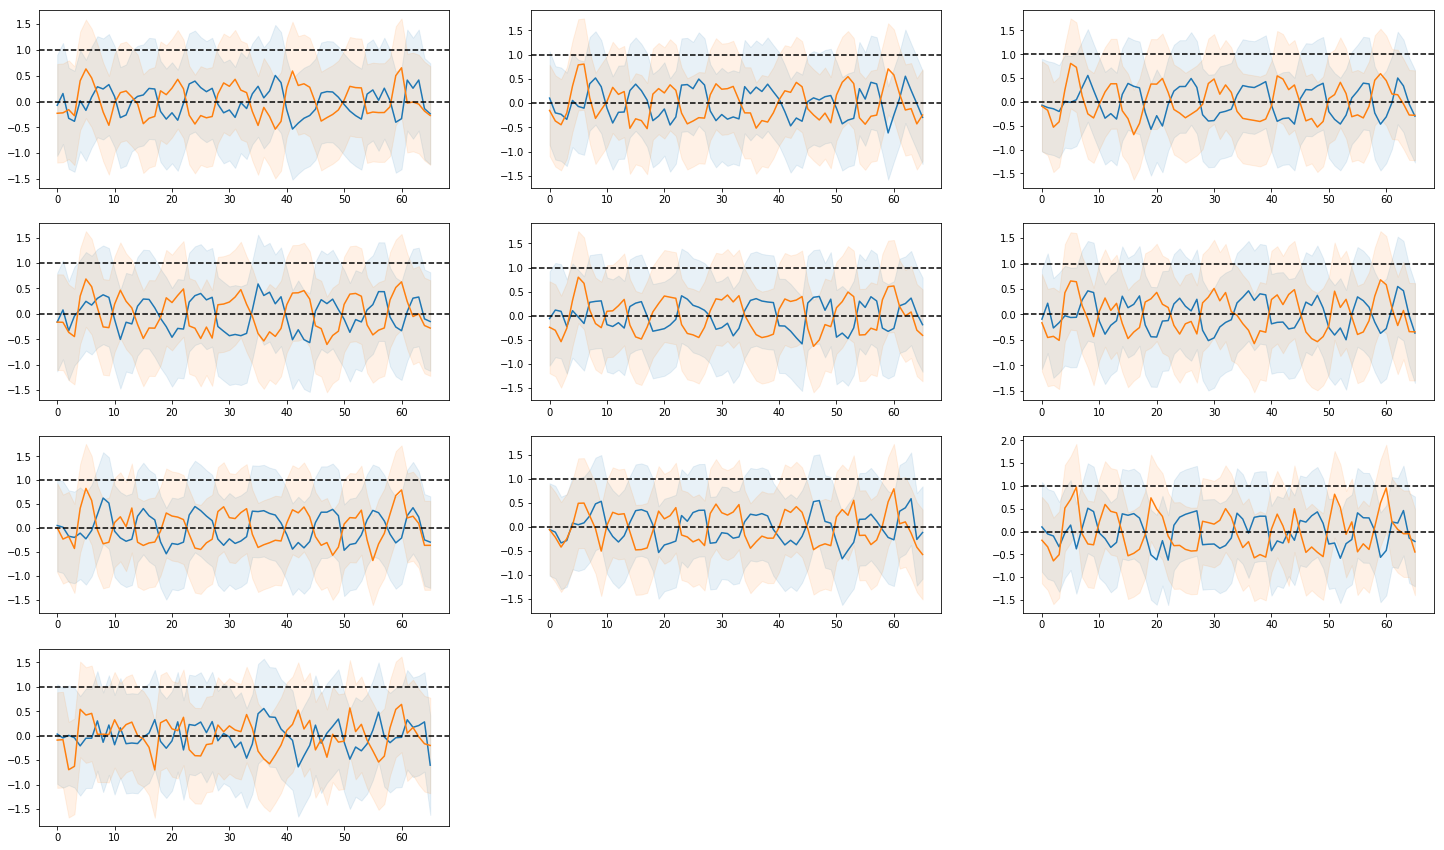

In [29]:
plt.figure(figsize=(25, 15))
for ix, (run, d) in enumerate(df.groupby(['run'])):
    ax = plt.subplot(4, 3, ix+1)
    
    mean_frames = d.groupby('frame').mean()
    
    ax.plot(d.groupby('frame').mean()['activation left eye'], color=sns.color_palette()[0])
    
    plt.fill_between(mean_frames.index.get_level_values('frame'),
                     mean_frames['activation left eye'] - mean_frames['SD(left eye)'],
                     mean_frames['activation left eye'] + mean_frames['SD(left eye)'], 
                     color=sns.color_palette()[0],
                     alpha=0.1)
    
    ax.plot(d.groupby('frame').mean()['activation right eye'], color=sns.color_palette()[1])
    plt.fill_between(mean_frames.index.get_level_values('frame'),
                     mean_frames['activation right eye'] - mean_frames['SD(right eye)'],
                     mean_frames['activation right eye'] + mean_frames['SD(right eye)'], 
                     color=sns.color_palette()[1],
                     alpha=0.1)    
    
    plt.axhline(0, c='k', ls='--')
    plt.axhline(1, c='k', ls='--')

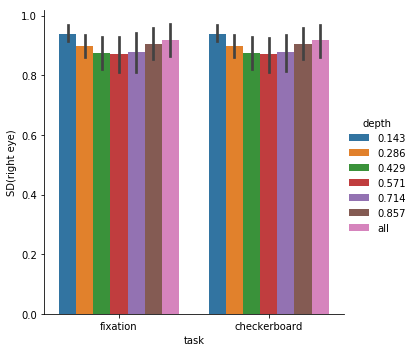

In [30]:
sns.catplot('task', 'SD(right eye)', 'depth', data=df.reset_index().groupby(['run', 'task', 'depth'], as_index=False).mean(), kind='bar')

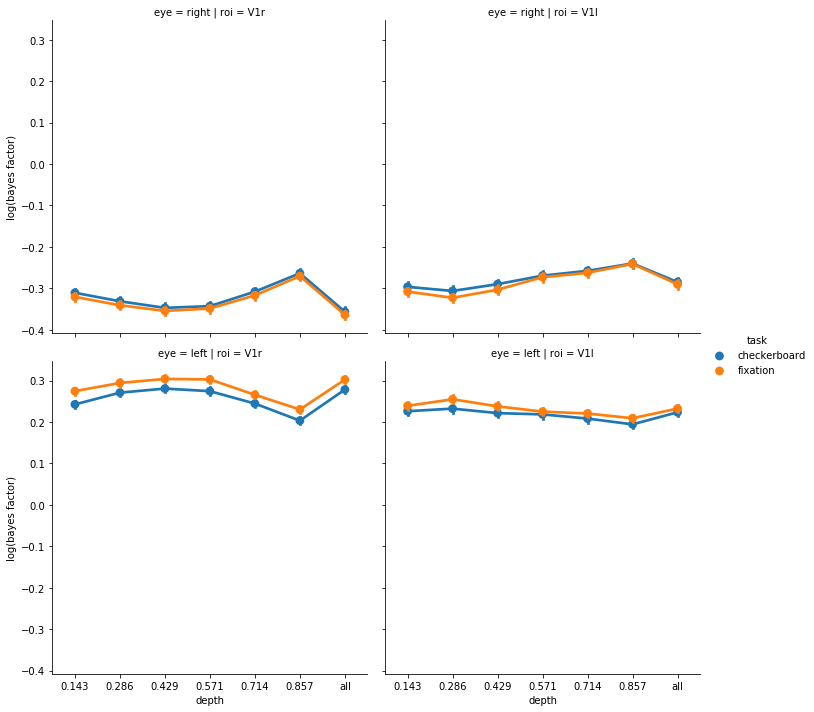

In [137]:
sns.catplot(y='log(bayes factor)', x='depth', hue='task', row='eye', data=df[df['bayes factor'] < 5].reset_index(), kind='point', col='roi')

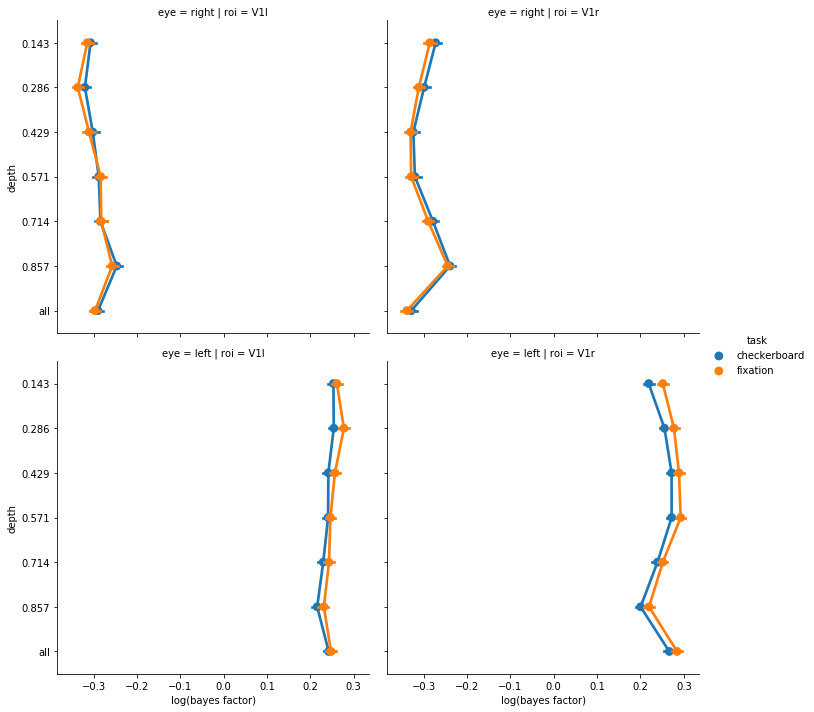

In [52]:
sns.catplot(x='log(bayes factor)', y='depth', hue='task', row='eye', data=df[df['bayes factor'] < 5].reset_index(), kind='point', col='roi')

In [32]:
import matplotlib.pyplot as plt

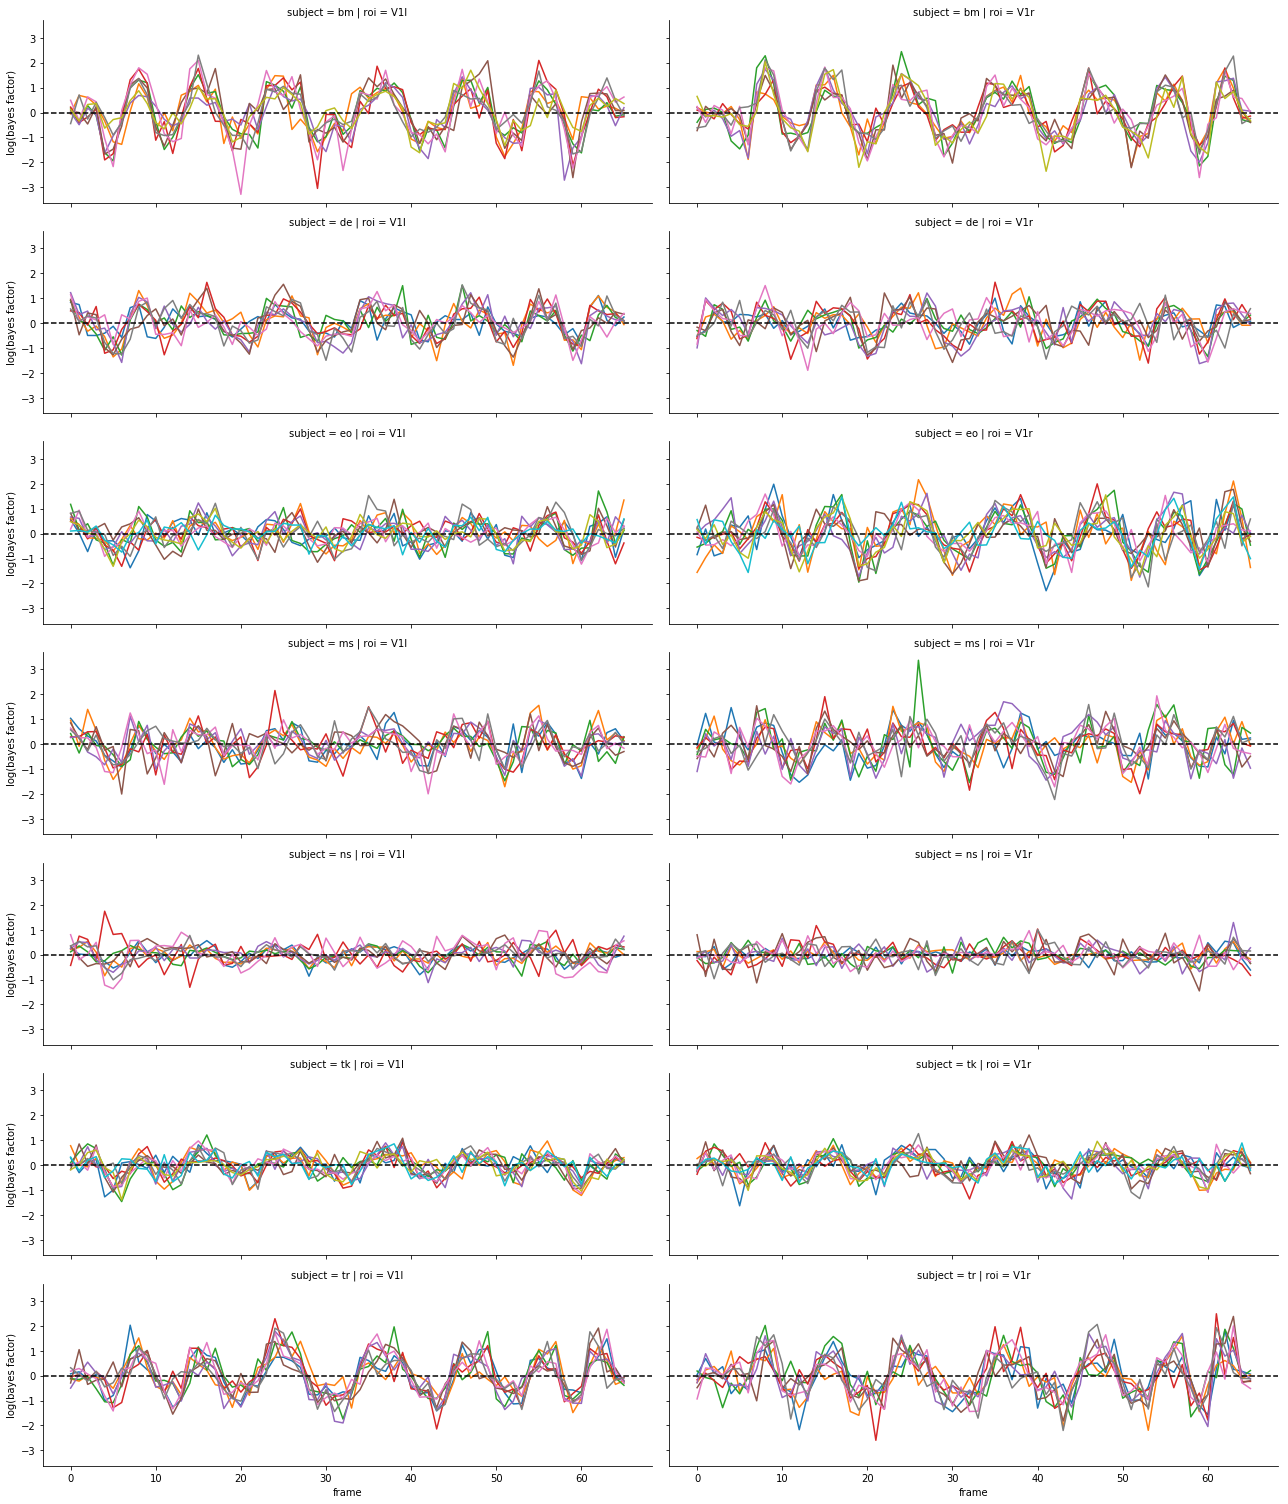

In [120]:
tmp = df[(df.n_vertices == 400) & (df.depth == 'all')].groupby(['subject', 'run', 'frame', 'roi']).mean()
fac = sns.FacetGrid(tmp.reset_index(), col='roi', row='subject', hue='run', aspect=3)
fac.map(sns.lineplot, 'frame', 'log(bayes factor)')

for ax in fac.axes.ravel():
    ax.axhline(0, c='k', ls='--')

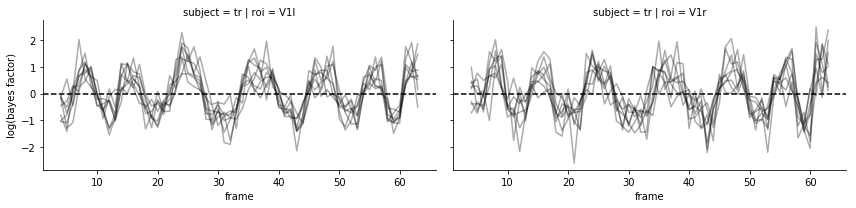

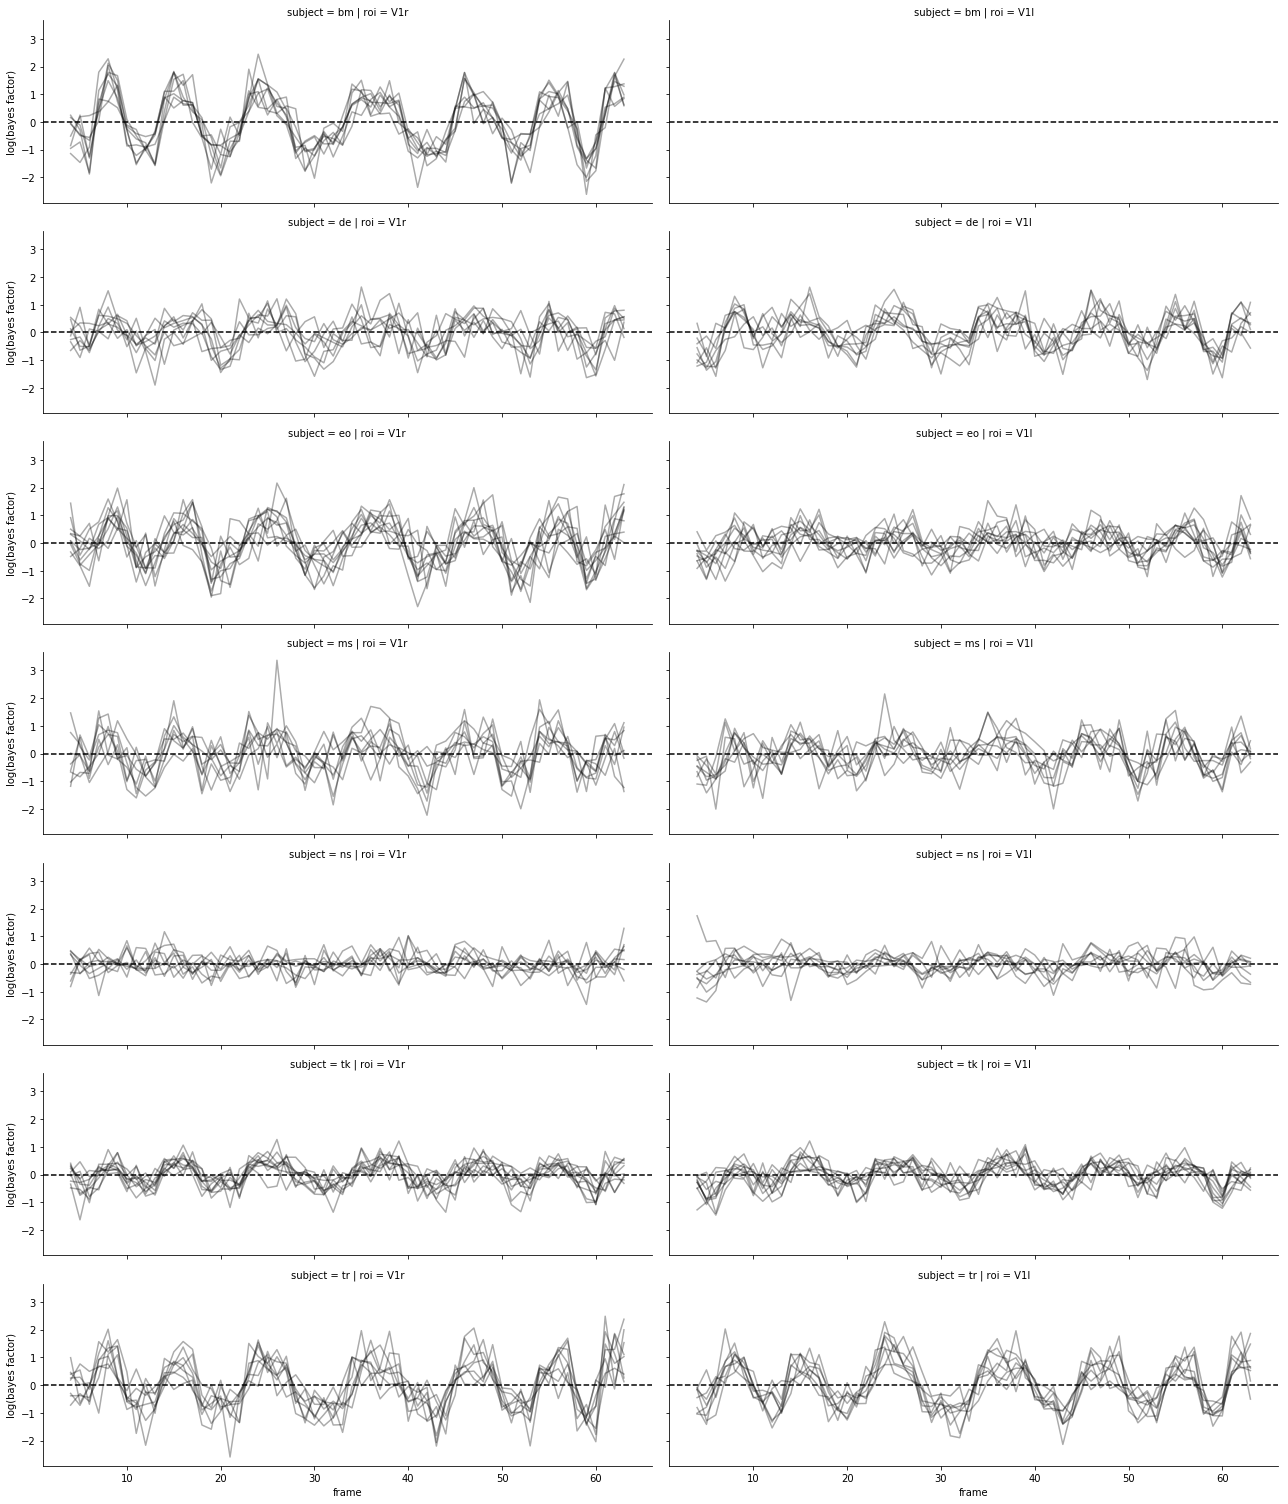

In [199]:
tmp = df[(df.n_vertices == 400) & (df.depth == 'all')].groupby(['subject', 'run', 'frame', 'task', 'roi']).mean()
fac = sns.FacetGrid(tmp.reset_index(), col='roi', hue='run', row='subject', aspect=3, palette=['k'])
fac.map_dataframe(sns.lineplot, 'frame', 'log(bayes factor)', style='task', alpha=0.33)

for ax in fac.axes.ravel():
    ax.axhline(0, c='k', ls='--')

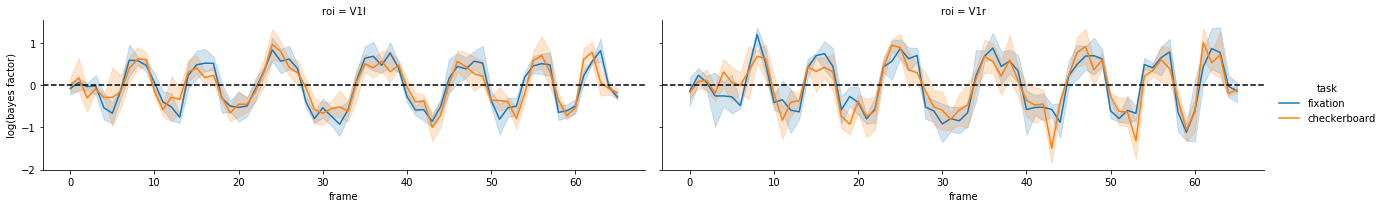

In [193]:
tmp = df[df.subject == 'tr'].groupby(['run', 'frame', 'roi', 'task']).mean()
fac = sns.FacetGrid(tmp.reset_index(), col='roi', hue='task', aspect=3)
fac.map(sns.lineplot, 'frame', 'log(bayes factor)')

for ax in fac.axes.ravel():
    ax.axhline(0, c='k', ls='--')\
    
fac.add_legend()

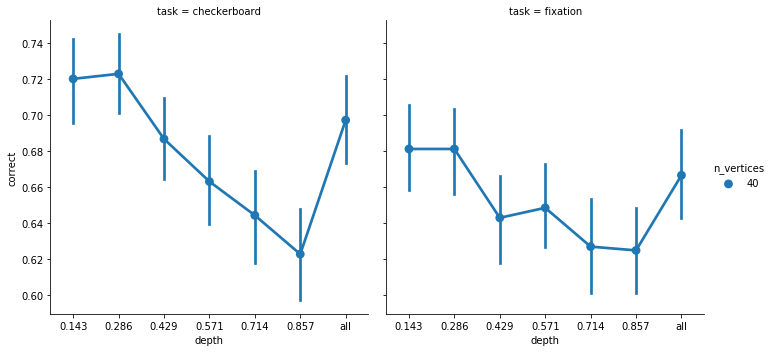

In [258]:
sns.catplot('depth', 'correct', 'n_vertices', df.reset_index(), kind='point', col='task')

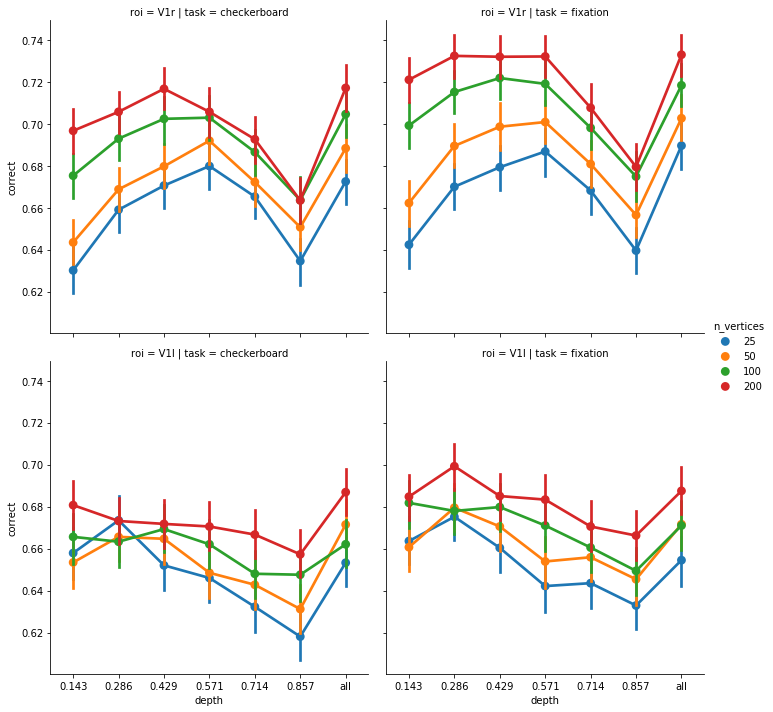

In [103]:
sns.catplot('depth', 'correct', 'n_vertices', df.reset_index(), kind='point', col='task', row='roi')

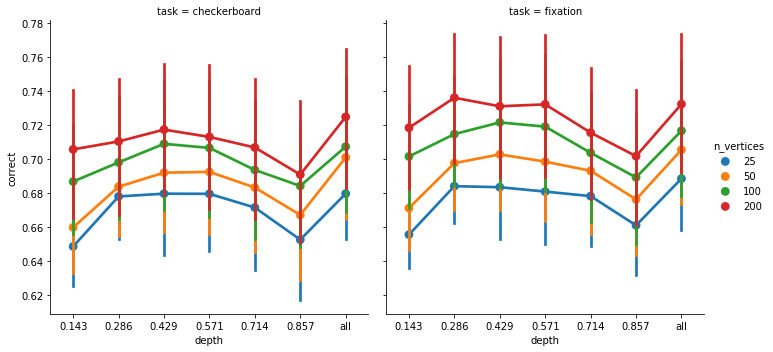

In [108]:
sns.catplot('depth', 'correct', 'n_vertices', df.groupby(['subject', 'session', 'task', 'depth', 'n_vertices']).mean().reset_index(), 
            kind='point', 
            col='task',
           ci=67)